# Lesson 1 Assignment - EnergyLoads
## Author - Natalie Moore

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [94]:
import pandas as pd #importing necessary packages
import numpy as np
from numpy import matlib
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
    
%matplotlib inline

from IPython.display import set_matplotlib_formats #matplotlib formatting that I like
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 11
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [73]:
#reading in the data and creating my dataframe
def read_building_data(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"):
    'Function to load the auto price data set from a .csv file' 

    #read the .csv file with the pandas read_csv method
    building_energy = pd.read_csv(fileName)
    
    #naming columns
    cols = ['Relative Compactness', 'Surface Area', 'Wall Area', 
          'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']

    #convert any non-numeric columns to numeric values
    for column in cols:
        building_energy[column] = pd.to_numeric(building_energy[column])
        
    return building_energy
building_energy = read_building_data()

print (building_energy.dtypes, building_energy.shape)

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object (768, 10)


In [74]:
building_energy.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


C:\Users\natal\AnacondaNEW\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

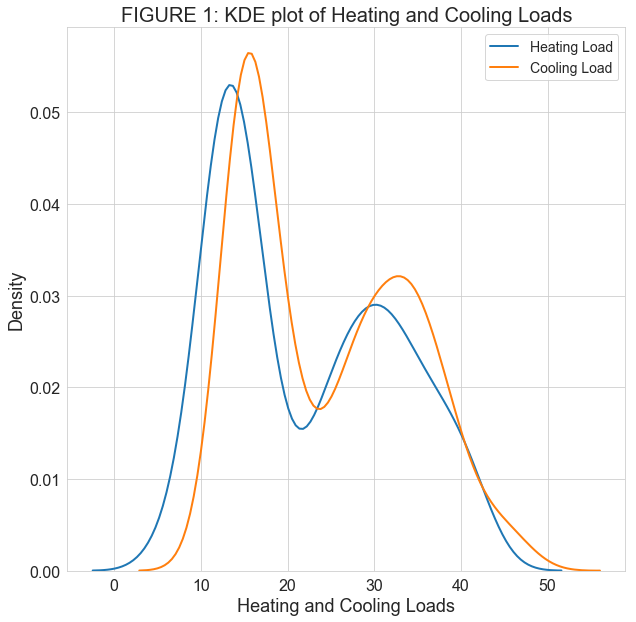

In [97]:
#Figure 1 plotting
fig = plt.figure()
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.kdeplot(building_energy.loc[:, 'Heating Load'], ax = ax)
sns.kdeplot(building_energy.loc[:, 'Cooling Load'], ax = ax)
ax.set_title('FIGURE 1: KDE plot of Heating and Cooling Loads') # Give the plot a main title
ax.set_xlabel('Heating and Cooling Loads') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

Text(0.5,0,'Overall Height')

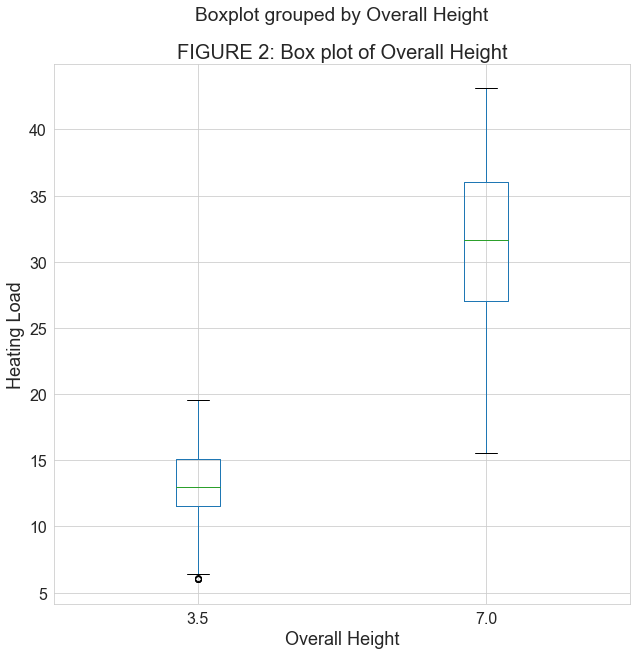

In [101]:
#Figure 2 plotting
fig = plt.figure()
ax = fig.gca()
building_energy.loc[:,['Overall Height', 'Heating Load']].boxplot(by = ['Overall Height'], ax = ax)
ax.set_title('FIGURE 2: Box plot of Overall Height') # Give the plot a main title
ax.set_ylabel('Heating Load')# Set text for y axis
ax.set_xlabel('Overall Height')# Set text for y axis

Text(0,0.5,'Glazing Area')

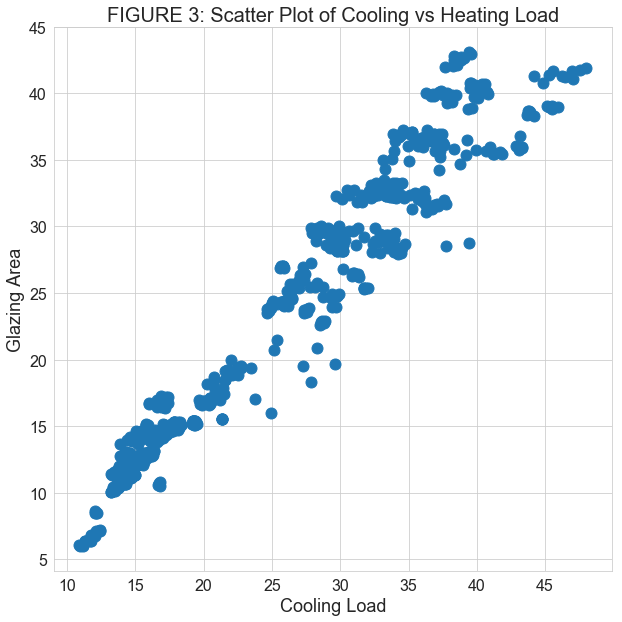

In [130]:
#Figure 3 plotting
fig = plt.figure()
ax = fig.gca()
sns.set_style("whitegrid")
ax.scatter(building_energy.loc[:,'Cooling Load'],building_energy.loc[:,'Heating Load'])
ax.set_title('FIGURE 3: Scatter Plot of Cooling vs Heating Load') # Give the plot a main title
ax.set_xlabel('Cooling Load')# Set text for y axis
ax.set_ylabel('Glazing Area')# Set text for y axis

C:\Users\natal\AnacondaNEW\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Cooling Load')

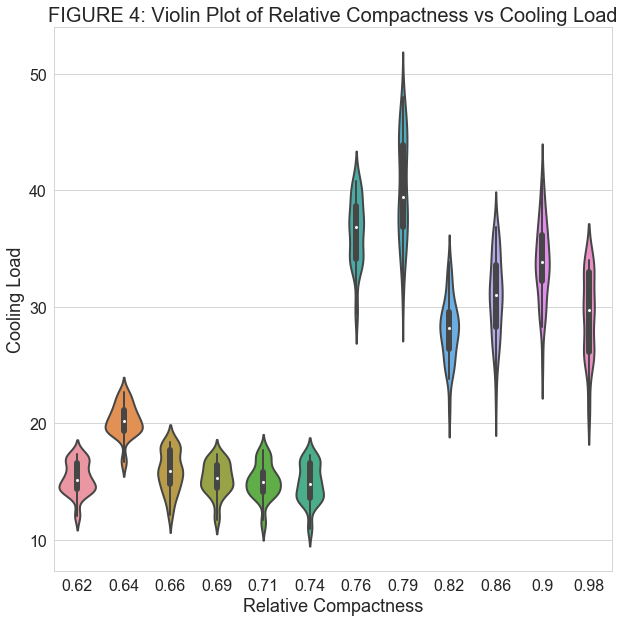

In [137]:
#Figure 4 plotting
fig = plt.figure()
ax = fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x = 'Relative Compactness', y = 'Cooling Load', data = building_energy, ax = ax)
ax.set_title('FIGURE 4: Violin Plot of Relative Compactness vs Cooling Load') # Give the plot a main title
ax.set_xlabel('Relative Compactness')# Set text for y axis
ax.set_ylabel('Cooling Load')# Set text for y axis

## ANALYSIS:

1. The heating load of buildings depends directly on the Overall Height of the building. Evidence for this relationship can be seen by the boxplot of Overall Height vs. Heating load in Figure 2, by noting how the interquartile ranges of each building height do not overlap. The mean heating load of a building increases drastically as its height also increases. It is also worth noting how much smaller the heating load range is for buildings of height 3.5 vs buildings of height 7.0. 


2. The heating and cooling load of buildings are directly related to one another. Evidence for this relationship can be seen by the linear correlation of the scatter plot in Figure 3 and by noting the similarity in the KDE curves of both the heating and cooling loads from Figure 1. 


3. The cooling load of buildings depends directly on the relative compactness (RC) of the building. Evidence for this relationship can be seen by the two "groups" of violin plots in Figure 4 and by noting how the interquartile ranges of each RC factor group do not overlap. It seems as though after surpassing an RC factor of about .75, the median cooling load of a building increases dramatically as well as the range.